# Theory

So far we worked with tabular data. Today we try something different, i.e.,  *image classification*. As a task, we aim to predict *digits* provided by the *MNIST* dataset, a popular dataset used in Machine Learning to test new algorithms.

We will now import it and see how such digits look like (after having loaded all relevant libraries).

In [2]:
# SETUP
# install python 3.10
#!apt-get install python3.10

# update symbolic links to the newly installed python version
#!ln -sf /usr/bin/python3.10 /usr/bin/python
#!ln -sf /usr/bin/python3.10 /usr/bin/python3

# install numpy 1.23.5
#%pip install numpy==1.23.5
# install scikit-learn 1.2.2
#%pip install scikit-learn==1.2.2
# install keras 2.13.1
#%pip install keras==2.13.1
# install tensorflow 2.13.0
#%pip install tensorflow==2.13.0

In [3]:
# import libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

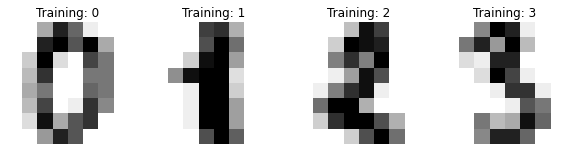

In [4]:
# load dataset
digits = datasets.load_digits()

# visualize dataset
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [5]:
# Split data into 80% train+validation and 20% test subsets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=False
)

# Split the train+validation into 80% train and 20% validation subsets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, shuffle=False
)

len(X_train), len(X_val), len(X_test)


(1149, 288, 360)

We can visualize one example --- how a data sample looks like.

In [6]:
X_train[0].shape

(64,)

In [7]:
X_train[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

It's a 1-dimensional array containing 64 integers, each representing the grey value of the corresponding pixel (the images were originally 8x8 pixels, but they have been flattened into a 1-dimensional array to use them more easily with the ML algorithms in Sklearn).
We can now begin to train a Support Vector Machine for classifying the digits.
We use a *polynomial kernel*: $K_{poly}(x_1, x_2) = (x_1^T x_2+e)^d$, where $d$ and $e$ are named *degree* and *coef0* in Sklearn, respectively. The parameter $e$ usually take the values {0,1}, while $d\geq 1$ indicates that we are considering d-tuples of the input elements. When $d=1, e=0$ we get a special case called *linear kernel* (the $\phi()$ corresponding to the linear kernel is $\phi(x)→x$, the identity function, so we are using the input features as they are).
We use a *polynomial kernel* with d=2, and we apply a gridsearch over the regularization parameter $C$ (other kernels are described in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)).

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score


svc_grid_params = {
    'C': (0.1, 1., 10),
}

#define a new SVC (SVM for classification) with polynomial kernel (d=2, e=1) and fixed random state
svc_clf = SVC(kernel = 'poly', degree=2, coef0=1, random_state=123)

#define the gridsearch instance
svc_v1 = GridSearchCV(svc_clf, svc_grid_params, n_jobs= -1, cv = 5)

#fit over the training + validation
svc_v1.fit(X_train_val, y_train_val)

#see the grid-search validation performance
svc_v1.best_score_

0.968696767324816

Models' performance can be evaluated in many ways. So far, we evaluate a model based on its capabilities at classifing some datapoints (e.g., accuracy score, F1-score). Another option is models' training time. In other words, in future, you might choose models you know perform well as accuracy, but also fast at training or prediction time.

We now want to show you how to calculate the training time performance.

In [9]:
import time
import numpy as np

#define the number of repetitions
repetitions = 5

#empty list saving the time
t = []

for _ in range(repetitions): #iterate over the repetitions
    ## training block
    svc_grid_params = {'C': (0.1, 1., 10)}
    svc_clf = SVC(kernel = 'linear', random_state=123)
    svc_v1 = GridSearchCV(svc_clf, svc_grid_params, n_jobs= -1, cv = 5)
    start_time = time.time() # get the starting time
    svc_v1.fit(X_train_val, y_train_val)
    end_time = time.time() # get the ending time

    delta = end_time - start_time
    t.append(delta)

np.mean(t)

0.09284849166870117

On average, it took us between $0.40$ and $0.55$ seconds to train an SVC with linear kernel. Notice that we repeat the training five times and get the average of the execution times because the notebooks are run on a computer in which multiple programs are running simultaneously, therefore each execution could take  different timings (and you might get an average different than ours).

# Exercises

## Exercise 1: Error Analysis

The role of a data scientist is not only to train models, but also to analyse their outcomes.

The *error analysis* is an example of such analyses, and something you should always do after training your models.
With this analysis, your aim is to answer the following question: "Why is my model mispredicting some samples?"

For example, sometimes the errors are legitimate. We are going to see an example now.

### Exercise 1.1

Using the dataset adopted during the theoretical part of the lab, select the best hyperparameters for an SVC using the following values:

    - kernel = 'rbf'
    - random_state = 123
    - C = [0.1, 1, 10]

Use the data splits done in the previous part as well (apply cross validation on train+val).
For the task, use the GridSearchCV with standard parameters as we always did.

Finally, compute the accuracy on the test set using the selected best model.

In [10]:
## Ex 1.1 Solution

svc_grid_params = {'C': (0.1, 1., 10)}
svc_clf = SVC(kernel = 'rbf', random_state=123)
svc_v2 = GridSearchCV(svc_clf, svc_grid_params, n_jobs= -1, cv = 5)
svc_v2.fit(X_train_val, y_train_val)

y_test_pred = svc_v2.predict(X_test)
print(accuracy_score(y_test_pred, y_test))

0.9583333333333334


Look at the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html"> [link] </a>.
Use the functions described there (specifically in the first example) to create a ConfusionMatrix using the best model you found.

Do you see any interesting pattern?


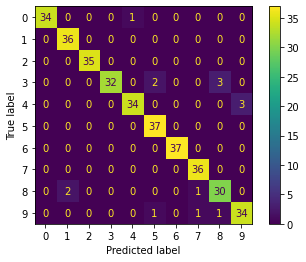

In [11]:
## Ex 1.2 Solution
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = svc_v2.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred, labels=svc_v2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_v2.classes_)
disp.plot()
plt.show()

If everything is correct, you should notice that the diagonals contains high values: this is expected, as it means that most of the predictions are correct.
Another interesting patterns can be found are the mispredictions. There are three examples of class 4 which are predicted as class 9. Let's see how they look like. Run the following code.


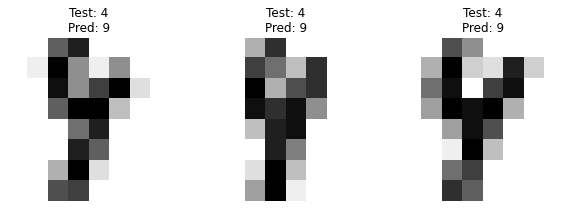

In [12]:
indices = np.all([ (y_test==4), (y_test_pred==9) ], axis=0) # find the index of the examples of class 4 predicted as class 9
                                                            # np.all returns the elements of the input vector that satisfy all conditions
_, axes = plt.subplots(nrows=1, ncols=sum(indices==True), figsize=(10, 3))
for ax, image, label, pred_label in zip(axes, X_test[indices], y_test[indices], y_test_pred[indices]):
    ax.set_axis_off()
    ax.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Test: %i\nPred: %i" % (label, pred_label))


We could argue that those seem more like 9s instead of 4s, in other words the labels are a bit noisy. As a result, we might decide not to spend time improving the performance of the algorithm, as they are not obvious errors.

These examples could be used when discussing the performance of our learning system with the clients, to show that those are mistakes that even some humans would do (of course before we need to check that the same happens for the other mistakes).

In summary, sometimes it is ok to have classifiers that do mistakes if these mistakes "make sense" somehow.


## Exercise 2: Visualising the Use of Different kernels

Recall that the SVM corresponds to a linear discriminant function in the feature space $\phi$. But how does the discriminat function look back in the input space? In this exercise, we will see how its change for different kernels and parameters. We start by creating a dataset, as usual.

[0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1
 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1
 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0
 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0
 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1
 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0
 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1
 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 0 0 0 1 

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

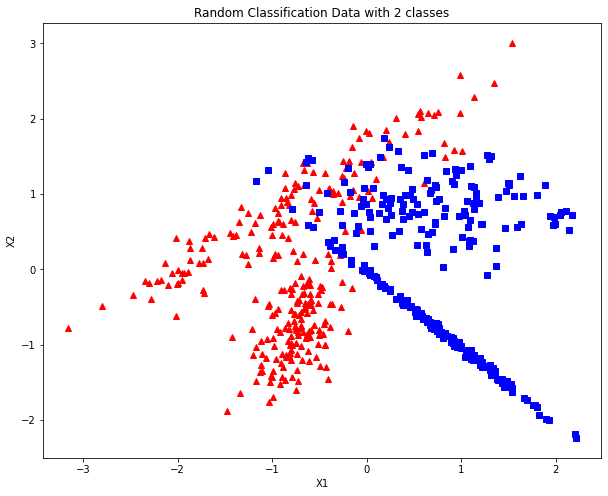

In [13]:
#import the data
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = datasets.make_classification(n_samples=700, n_features=2, random_state=124, n_redundant= 0, n_informative=2, scale=10, shift=10)
X[:, 0] = X[:, 0]*0.1

# split the data into training, and testing set.
# note: for this exercise we avoid the validation set since
# we only aim to understand how different models perform.
# we do not adopt any validation process
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, shuffle=False)

# scale
scl = StandardScaler()
scl.fit(X_train)
X_train = scl.transform(X_train)
X_test = scl.transform(X_test)

print(y_train)
print(len(y_train[y_train == 0]))
print(len(y_train[y_train == 1]))

# visualize the data
fig = plt.figure(figsize=(10,8))
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'r^')
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bs')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Random Classification Data with 2 classes')


We now create the function that, given a trained model, some data samples $X$, and the ground truth $y$, plots the model decision boundary.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


def plot_discriminat_function(X,y, trained_model):
    ## Plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # h = (x_max / x_min)/100
    # xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # X_plot = np.c_[xx.ravel(), yy.ravel()]
    x_span = np.linspace(x_min, x_max, 100)
    y_span = np.linspace(y_min, y_max, 100)
    xx, yy = np.meshgrid(x_span, y_span)
    X_plot = np.c_[xx.ravel(), yy.ravel()]

    predicted = trained_model.predict(X_plot)
    predicted = predicted.reshape(xx.shape)

    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.contourf(xx, yy, predicted, alpha=0.5)
    plt.set_cmap("gist_rainbow")
    # plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.title(trained_model)
    plt.show()


### Exercise 2.1

Train an SVC with:


*   kernel = 'poly'
*   degree = 2
*   coef0 = 1
*   random_state = 123

Feed the trained model into *plot_discriminat_function*, and visually analze the obtained decision boundary.



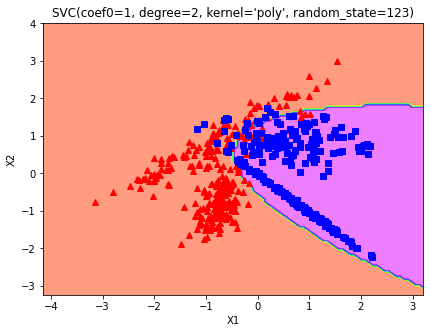

In [15]:
# EX 2.1 solution
svclassifier = SVC(kernel="poly", degree=2, coef0=1, random_state = 123)
svclassifier.fit(X_train, y_train)
plot_discriminat_function(X_train, y_train, svclassifier)


You should notice that the discriminant function is not a line in the input space.

### Exercise 2.2

Let's define now a function that, given a trained model, computes training and testing accuracy.

Then, use this function over the model trained in Exercise 2.1 (previous step).

In [16]:
# EX 2.2 SOLUTION
def compute_accuracy(trained_model, X_train, y_train, X_test, y_test):
    print("Accuracy on Train:", accuracy_score(y_train, trained_model.predict(X_train)))
    print("Accuracy on Test:", accuracy_score(y_test, trained_model.predict(X_test)))

compute_accuracy(svclassifier, X_train, y_train, X_test, y_test)

Accuracy on Train: 0.9339285714285714
Accuracy on Test: 0.9071428571428571


### Exercise 2.3

Repeat the experiment with an SVC with linear kernel and random_state=123. Compare it with the polynomial one in terms of both accuracy (training and testing time) and discriminant function (using the plotting function).


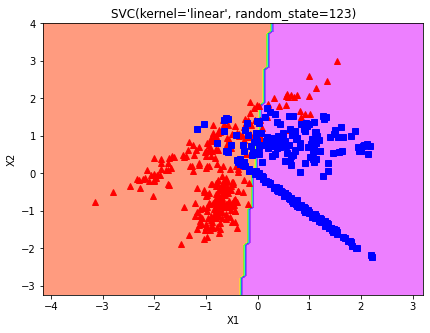

Accuracy on Train: 0.8892857142857142
Accuracy on Test: 0.85


In [17]:
## EX 2.3 Solution
svclassifier = SVC(kernel="linear", random_state=123)
svclassifier.fit(X_train, y_train)
plot_discriminat_function(X_train, y_train, svclassifier)
compute_accuracy(svclassifier, X_train, y_train, X_test, y_test)

### Exercise 2.4

Repeat what done in Exercise 2.3.
This time, use an RBF kernel at the varying of $\sigma$ = [0.001, 0.1, 10, 100, 500], while keeping the random_state as 123.

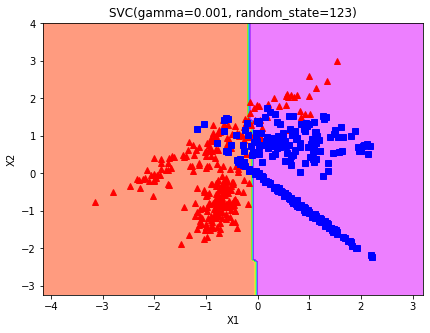

Accuracy on Train: 0.8910714285714286
Accuracy on Test: 0.85


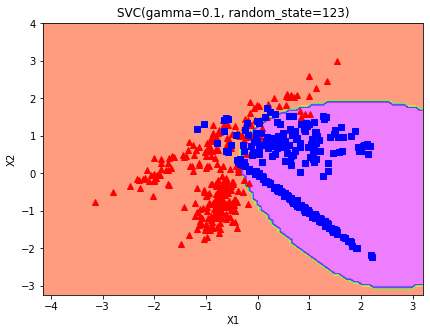

Accuracy on Train: 0.9267857142857143
Accuracy on Test: 0.8857142857142857


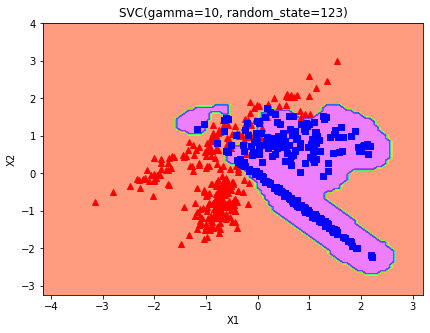

Accuracy on Train: 0.9535714285714286
Accuracy on Test: 0.8928571428571429


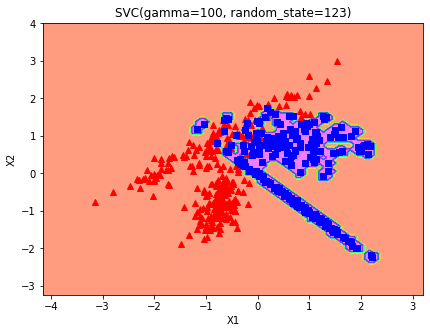

Accuracy on Train: 0.9732142857142857
Accuracy on Test: 0.8857142857142857


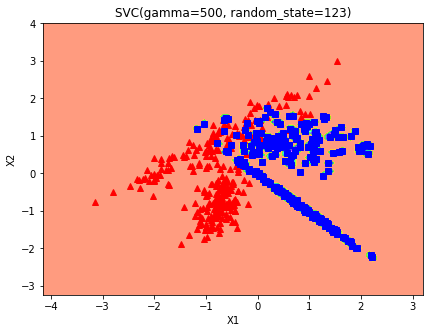

Accuracy on Train: 0.9892857142857143
Accuracy on Test: 0.7857142857142857


In [18]:
# EX 2.4 Solution
for sigma in [0.001, 0.1, 10, 100, 500]:
  svclassifier = SVC(kernel="rbf", gamma=sigma, random_state=123)
  svclassifier.fit(X_train, y_train)
  plot_discriminat_function(X_train, y_train, svclassifier)
  compute_accuracy(svclassifier, X_train, y_train, X_test, y_test)


You should notice that the higher $\sigma$, the better the model over the training data.

However, the accuracy on the test set does not show the same behaviour: it improves until $\sigma=10$, and then it decreses. With high $\sigma$ values we overfit our data, meaning that the decision function tends to coincide with the training examples of the blue class (basically it's memorizing them).

## Exercise 3: Comparing the Execution Times of Learning Algorithms

In this exercise, we are going to experiment with the computational cost, i.e. training and prediction time, of different learning algorithms.

The exercise is conducted over the *MNIST* dataset. Since we will not optimising the hyperparameters of the learning algorithms, but we will use the default values, we don't have to create the validation set.

**ALERT: for this entire exercise, do not set any random_state**

In [19]:
from sklearn.preprocessing import StandardScaler
# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=False
)

### scale the data
scl = StandardScaler().fit(X_train)
X_train_scl = scl.transform(X_train)
X_test_scl = scl.transform(X_test)

num_classes = len(set(y_train))
num_features = X_train.shape[1]

print(f"train size={len(X_train_scl)}, test size={len(X_test_scl)}")
print(f"number of features = {num_features}; number of classes = {num_classes}")

train size=1437, test size=360
number of features = 64; number of classes = 10


### Exercise 3.1: Function for Collecting Stats on Execution Time and Accuracy

Create a function that, given a learning algorithm implemented in Sklearn: 1) trains it on the training set; 2) computes the predictions over training and test sets.
The function must keep track of the time needed to do training, that needed to make predictions and the accuracies on the training and test sets.

Such values should be defined as the average over 5 executions.
More precisely, the results should be added to the following lists:

1.   tr_time_list = list containing the training time of a specific model.
2.   te_time_list = list containing the testing time of a specific model; this execution time contains the prediction on both train and test splits.
3.   tr_acc_list = list containing the training accuracy of a specific model.
4.   te_acc_list = list containing the accuracy on the test set of a specific model.
5.   model_name_list = list containing the model name.

Complete the code below that implements the function described in this box.

In [20]:
# ## Ex 3.1
# from sklearn.linear_model import Perceptron

# def test_algorithm(learning_alg, X_train, y_train, X_test, y_test):

#   #empty list to keep track of the running times and accuracy values of each repetition
#   train_time, test_time, train_accuracy, test_accuracy = [], [], [], []

#   #
#   # ADD YOUR CODE HERE
#   #

#   #the function need to return all the stats computed. The following line of code does that
#   return np.mean(train_time), np.mean(test_time), np.mean(train_accuracy), np.mean(test_accuracy)

# # You can test your function by invoking it as follows
# clf = Perceptron()
# tr_time, te_time, tr_acc, te_acc = test_algorithm(clf, X_train_scl,y_train, X_test_scl, y_test)
# print(f"Perceptron\n   Training time: {tr_time}\n   Prediction time: {te_time}")
# print(f"   Accuracy on train: {tr_acc}\n   Accuracy on test {te_acc}")

In [21]:
## Ex 3.1 SOLUTION
from sklearn.linear_model import Perceptron

def test_algorithm(learning_alg, X_train, y_train, X_test, y_test):

  #empty list to keep track of the running times and accuracy values of each repetition
  train_time, test_time, train_accuracy, test_accuracy = [], [], [], []

  for _ in range(5): #repeat the runs 5 times

    start_time = time.time() # get the starting time
    learning_alg.fit(X_train, y_train)
    end_time = time.time() # get the ending time
    train_time.append(end_time - start_time)

    start_time = time.time() # get the starting time
    y_train_pred = learning_alg.predict(X_train)
    y_test_pred = learning_alg.predict(X_test)
    end_time = time.time() # get the ending time
    test_time.append(end_time - start_time)

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

  return np.mean(train_time), np.mean(test_time), np.mean(train_accuracy), np.mean(test_accuracy)

# You can test your function by invoking it as follows
clf = Perceptron()
tr_time, te_time, tr_acc, te_acc = test_algorithm(clf, X_train_scl, y_train, X_test_scl, y_test)
print(f"Perceptron\n   Training time: {tr_time}\n   Prediction time: {te_time}")
print(f"   Accuracy on train: {tr_acc}\n   Accuracy on test {te_acc}")

Perceptron
   Training time: 0.027577924728393554
   Prediction time: 0.0006173133850097656
   Accuracy on train: 0.9832985386221293
   Accuracy on test 0.8916666666666668


### Exercise 3.2

Now use the function test_algorithm() implemented in the previous exercise to collect statistics for the following models:

1. Perceptron
2. Logistic Regression
3. SVM with linear kernel
4. SVM with polynomial kernel of degree 2
5. SVM with polynomial kernel of degree 3
6. Decision Tree using Entropy for splitting
7. K-NN with K=3

The final statistics must be collected in the following lists: tr_time_list, te_time_list, tr_acc_list, te_acc_list, model_name_list, which are defined in the previuos exercise.

In order to reduce your waiting time, you might want to use more than one cell, even one per algorithm.

In [22]:
# EX 1.2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree

#initialize the lists collecting the stats
tr_time_list, te_time_list, tr_acc_list, te_acc_list, model_name_list = [], [], [], [], []

## ADD YOUR CODE HERE THAT INVOKES test_algorithm() and collects the statistics in the lists above



In [23]:
# EX 1.2 SOLUTION
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

#initialize the lists collecting the stats
tr_time_list, te_time_list, tr_acc_list, te_acc_list, model_name_list = [], [], [], [], []

model_name_list.append("Perceptron")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(Perceptron(), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time);
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("Logistic Regression")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(LogisticRegression(), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time);
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("SVM Linear Kernel")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(SVC(kernel="linear"), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time);
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("SVM Polynomial Kernel d=2")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(SVC(kernel="poly", degree=2), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time);
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("SVM Polynomial Kernel d=3")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(SVC(kernel="poly", degree=3), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time);
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("Decision Tree")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(tree.DecisionTreeClassifier(criterion='entropy'), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time);
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

model_name_list.append("3-NN")
train_time, test_time, train_accuracy, test_accuracy = test_algorithm(KNeighborsClassifier(n_neighbors=3), X_train_scl, y_train, X_test_scl, y_test)
tr_time_list.append(train_time)
te_time_list.append(test_time);
tr_acc_list.append(train_accuracy)
te_acc_list.append(test_accuracy)

for i in range(len(tr_time_list)):
  print(f"{model_name_list[i]}\n   Training time: {tr_time_list[i]}\n   Prediction time: {te_time_list[i]}")
  print(f"   Accuracy on train: {tr_acc_list[i]}\n   Accuracy on test {te_acc_list[i]}")

AttributeError: 'NoneType' object has no attribute 'split'

### Visualising the Results

We can now visualise the results obtained. Remember that here, each of the five lists must contain 7 values. Double check it: if you have more, you might have re-executed a cell multiple times. If so, just re-execute the entire notebook.

In [24]:
#this cell checks if you have the right amount of info
expected_list_length = 7
assert len(tr_acc_list) == expected_list_length
assert len(te_acc_list) == expected_list_length
assert len(tr_time_list) == expected_list_length
assert len(te_time_list) == expected_list_length
assert len(model_name_list) == expected_list_length

AssertionError: 

Text(0, 0.5, 'Training Time [s]')

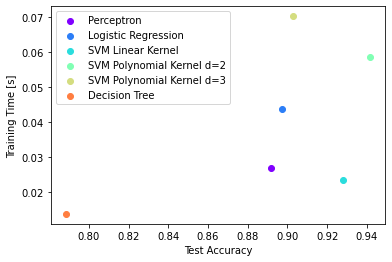

In [25]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(model_name_list)))
for x, y, c, m in zip(te_acc_list, tr_time_list, colors, model_name_list):
    plt.scatter(x, y, color = c, label = m)
plt.legend()
plt.xlabel("Test Accuracy")
plt.ylabel("Training Time [s]")


Text(0, 0.5, 'Prediction Time [s]')

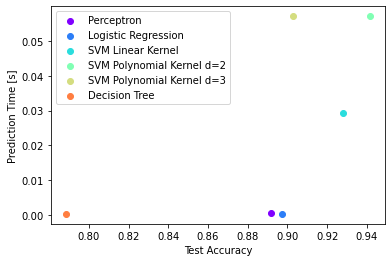

In [26]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(model_name_list)))
for x, y, c, m in zip(te_acc_list, te_time_list, colors, model_name_list):
    plt.scatter(x, y, color = c, label = m)
plt.legend()
plt.xlabel("Test Accuracy")
plt.ylabel("Prediction Time [s]")


# Ex 3.3

In this new exercise, it's time to be more independent from us. \
Try and get good performances on the *wine_dataset*.

Remember: use the testing set only *at the end*, after you selected the best model.


In [ ]:
from sklearn.datasets import load_wine #load our target dataset

#load the dataset
dataset = load_wine()

#extract X and y
X = dataset.data
y = dataset.target

#split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123)